# Clusterização - Hierarquico

Veremos os seguintes algoritmos na pratica:
* Hierarquico Aglomerativo
* BIRCH

In [1]:
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

### Carregamento dos dados

Iremos usar o dataset IRIS esse conjunto traz 150 amostras de três espécies de Iris (Iris setosa, Iris virginica e Iris versicolor) que, apesar de muito semelhantes, são passíveis de distinção usando um modelo desenvolvido pelo biólogo e estatístico Ronald Fisher.

Novamente não iremos realizar a normalização dos dados, mas lembre que tal tarefa é importante para a clusterização.

In [2]:
iris = datasets.load_iris()

In [3]:
# ajustando para dataframe
iris_data = iris.data
iris_target = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [4]:
iris_data[:2]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

In [5]:
iris_target[:2]

array([0, 0])

In [6]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
np.unique(iris_target)

array([0, 1, 2])

In [9]:
# convertendo em dataframe
df_base = pd.DataFrame(data=iris_data, columns=feature_names)
# df_base['target'] = iris_target
df_base.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## 1. Hierarquico Aglomerativo

In [10]:
from sklearn.cluster import AgglomerativeClustering

In [26]:
# define o modelo
model =  AgglomerativeClustering(n_clusters = 3,linkage="complete")

In [27]:
# fita o modelo model
yhat =model.fit_predict(df_base)

In [28]:
yhat[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [29]:
# adicionando a coluna do dataframe
df_resultados = df_base.copy()
df_resultados["grupo"] = yhat
df_resultados.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),grupo
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1


In [30]:
# Quantidade de clusters
clusters = np.unique(yhat)
clusters

array([0, 1, 2], dtype=int64)

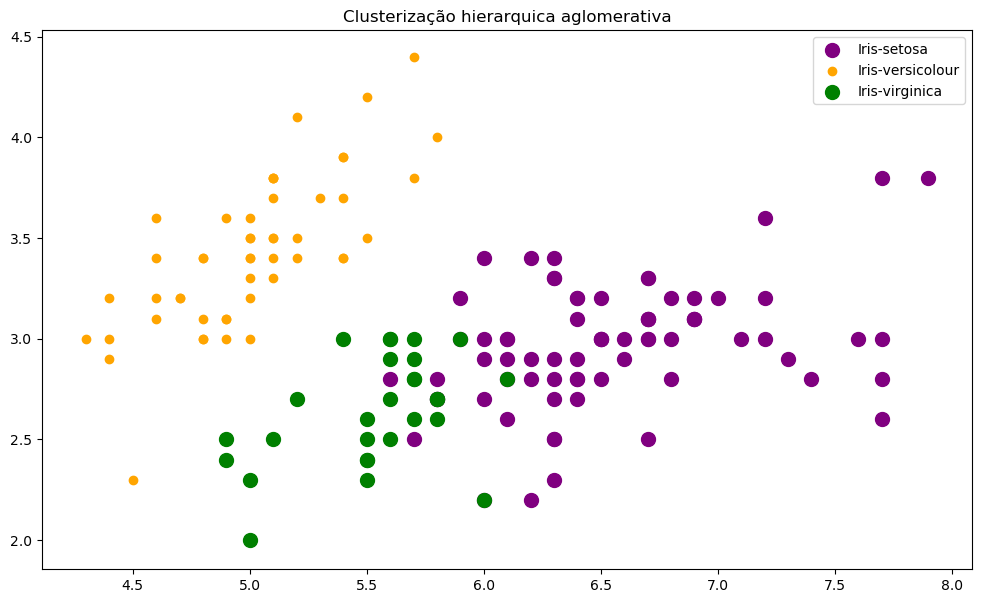

In [31]:
# visualizando
# lembrando que aqui temos 4 dimensoes, acabamos escolhendo apenas duas para ver
# futuramente iremos ver como podemos fazer a reducao de dimensionalidade
plt.figure(figsize=(12, 7))
plt.scatter(df_resultados.loc[df_resultados["grupo"] == 0, "sepal length (cm)"],
            df_resultados.loc[df_resultados["grupo"] == 0, "sepal width (cm)"],
              s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(df_resultados.loc[df_resultados["grupo"] == 1, "sepal length (cm)"],
            df_resultados.loc[df_resultados["grupo"] == 1, "sepal width (cm)"],
            c = 'orange', label = 'Iris-versicolour')
plt.scatter(df_resultados.loc[df_resultados["grupo"] == 2, "sepal length (cm)"],
            df_resultados.loc[df_resultados["grupo"] == 2, "sepal width (cm)"],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.title("Clusterização hierarquica aglomerativa")
plt.legend()
plt.show()

#### plotando o dendrograma

In [33]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

In [34]:
# Você pode escolher diferentes métodos aqui, como 'single', 'complete', 'average'
linkage_matrix = linkage(df_base, method='complete') 

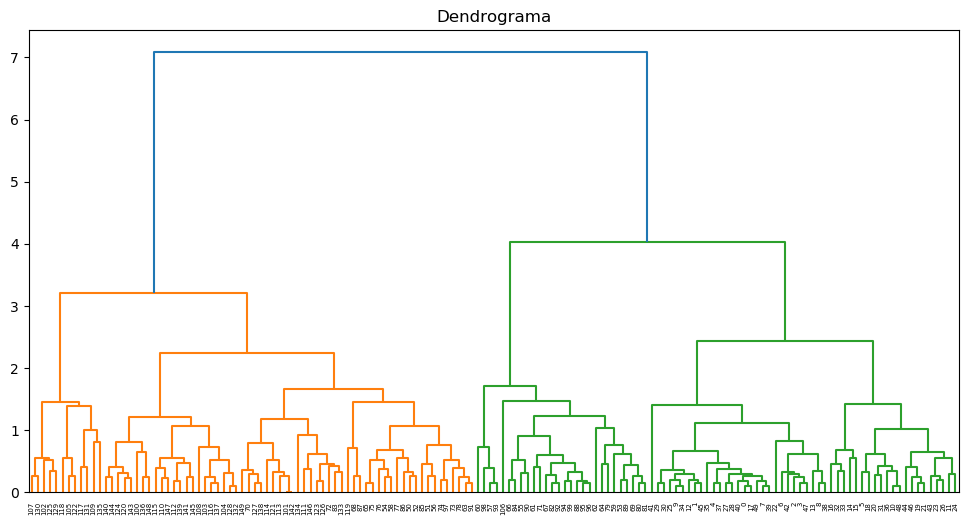

In [35]:
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title("Dendrograma")
plt.show()

### Segundo exemplo

In [36]:
from sklearn.datasets import make_classification

In [50]:
# define dataset
df_base2, _ = make_classification(n_samples=10000,
                                  n_features=2, 
                                  n_informative=2, 
                                  n_redundant=0, 
                                  n_clusters_per_class=1, 
                                  random_state=4)

In [51]:
df_base2 = pd.DataFrame(df_base2,columns=["variavel1","variavel2"])

In [52]:
# define o modelo
model2 =  AgglomerativeClustering(n_clusters = 2,linkage="complete")
model3 =  AgglomerativeClustering(n_clusters = 2,linkage="single")
model4 =  AgglomerativeClustering(n_clusters = 2,linkage="ward")

# fita o modelo model
yhat2 =model2.fit_predict(df_base2)
yhat3 =model3.fit_predict(df_base2)
yhat4 =model4.fit_predict(df_base2)

# adicionando a coluna do dataframe
df_resultados2 = df_base2.copy()
df_resultados2["grupo_complete"] = yhat2
df_resultados2["grupo_single"] = yhat3
df_resultados2["grupo_ward"] = yhat4

In [53]:
df_resultados2.head()

,variavel1,variavel2,grupo_complete,grupo_single,grupo_ward
0,-0.039869,-0.401509,0,0,0
1,1.509359,-1.008493,0,0,0
2,-1.756274,-1.096951,1,0,1
3,-1.624811,-1.369115,1,0,1
4,0.622521,-0.803206,0,0,0


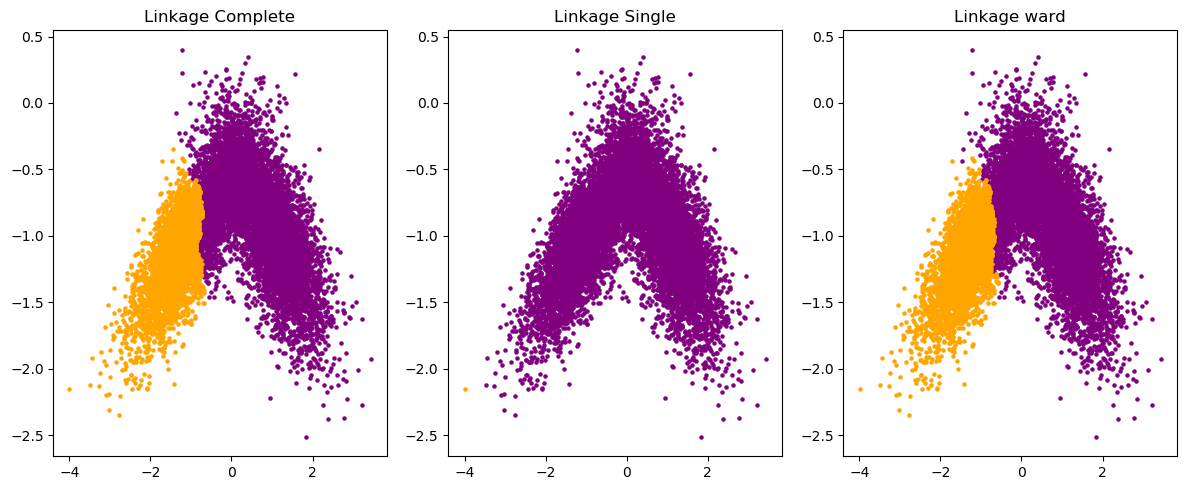

In [54]:
# visualização

# Criar a figura e os subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Scatterplot 1
axs[0].scatter(df_resultados2.loc[df_resultados2["grupo_complete"] == 0, "variavel1"],
               df_resultados2.loc[df_resultados2["grupo_complete"] == 0, "variavel2"],
              s = 5, c = 'purple', label = 'grupo_complete0')
axs[0].scatter(df_resultados2.loc[df_resultados2["grupo_complete"] == 1, "variavel1"],
               df_resultados2.loc[df_resultados2["grupo_complete"] == 1, "variavel2"],
              s = 5, c = 'orange', label = 'grupo_complete1')
axs[0].set_title('Linkage Complete')

# Scatterplot 2
axs[1].scatter(df_resultados2.loc[df_resultados2["grupo_single"] == 0, "variavel1"],
               df_resultados2.loc[df_resultados2["grupo_single"] == 0, "variavel2"],
              s = 5, c = 'purple', label = 'grupo_single0')
axs[1].scatter(df_resultados2.loc[df_resultados2["grupo_single"] == 1, "variavel1"],
               df_resultados2.loc[df_resultados2["grupo_single"] == 1, "variavel2"],
              s = 5, c = 'orange', label = 'grupo_single1')
axs[1].set_title('Linkage Single')

# Scatterplot 3
axs[2].scatter(df_resultados2.loc[df_resultados2["grupo_ward"] == 0, "variavel1"],
               df_resultados2.loc[df_resultados2["grupo_ward"] == 0, "variavel2"],
              s = 5, c = 'purple', label = 'grupo_ward0')
axs[2].scatter(df_resultados2.loc[df_resultados2["grupo_ward"] == 1, "variavel1"],
               df_resultados2.loc[df_resultados2["grupo_ward"] == 1, "variavel2"],
              s = 5, c = 'orange', label = 'grupo_ward1')
axs[2].set_title('Linkage ward')

# Ajustar o layout e exibir o gráfico
plt.tight_layout()
plt.show()

# 2. BIRCH

In [113]:
from sklearn.cluster import Birch

In [115]:
%%time
# define o modelo
model_birch =  Birch(n_clusters = 3)

# fita o modelo model
yhat_birch =model_birch.fit_predict(df_base)

CPU times: total: 469 ms
Wall time: 379 ms


Veja como o algoritmo é rapido quando comparado com os demais métodos.

In [116]:

# adicionando a coluna do dataframe
df_resultados_birch = df_base.copy()
df_resultados_birch["grupo"] = yhat_birch

In [117]:
df_resultados_birch.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),grupo
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


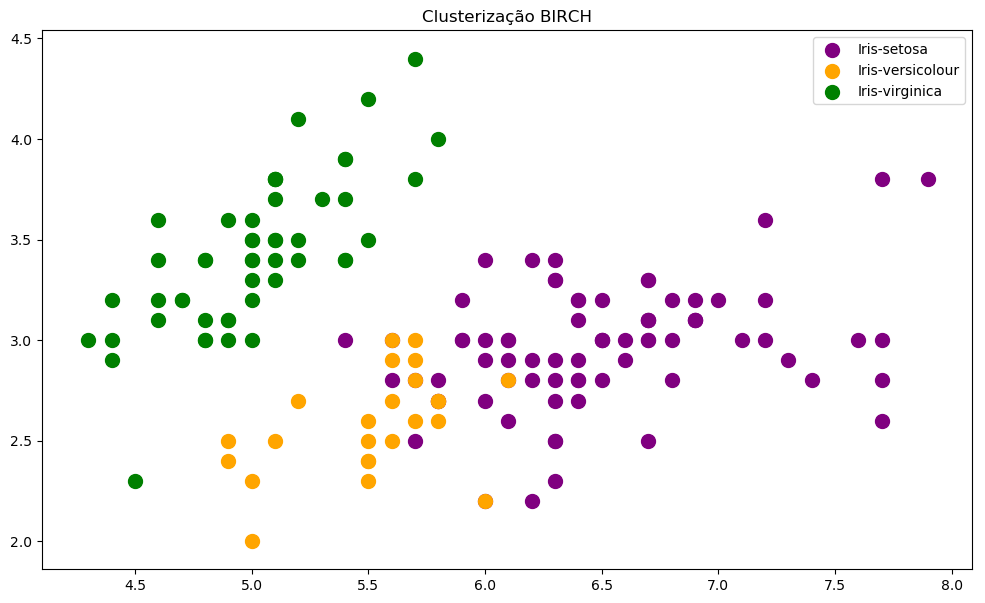

In [126]:
# visualizando
# lembrando que aqui temos 4 dimensoes, acabamos escolhendo apenas duas para ver
# futuramente iremos ver como podemos fazer a reducao de dimensionalidade
plt.figure(figsize=(12, 7))
plt.scatter(df_resultados_birch.loc[df_resultados_birch["grupo"] == 0, "sepal length (cm)"],
            df_resultados_birch.loc[df_resultados_birch["grupo"] == 0, "sepal width (cm)"],
              s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(df_resultados_birch.loc[df_resultados_birch["grupo"] == 1, "sepal length (cm)"],
            df_resultados_birch.loc[df_resultados_birch["grupo"] == 1, "sepal width (cm)"],
            s = 100,c = 'orange', label = 'Iris-versicolour')
plt.scatter(df_resultados_birch.loc[df_resultados_birch["grupo"] == 2, "sepal length (cm)"],
            df_resultados_birch.loc[df_resultados_birch["grupo"] == 2, "sepal width (cm)"],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.title("Clusterização BIRCH")
plt.legend()
plt.show()

Conforme mencionado o BIRCH lida bem com a presença de outliers, vamos gerar uma base com alguns outliers para comparar a perfomance em relacao aos outros métodos

In [152]:
# define dataset
df_base2, _ = make_classification(n_samples=10000,
                                  n_features=2, 
                                  n_informative=2, 
                                  n_redundant=0, 
                                  n_clusters_per_class=1, 
                                  random_state=4)


df_base2 = pd.DataFrame(df_base2,columns=["variavel1","variavel2"])

In [153]:
# vamos gerar alguns outliers
df_base2.describe()

,variavel1,variavel2
count,10000.000000,10000.000000
mean,-0.007061,-0.995586
std,1.198239,0.391989
min,-3.994137,-2.509793
25%,-1.014345,-1.256821
50%,0.024862,-0.995555
75%,1.000464,-0.736434
max,3.447590,0.398049


In [154]:
# vamos passar pontos bem maiores e menores para estas variaveis
np.random.seed(42)

In [155]:

max_v1 = df_base2["variavel1"].max()
max_v2 = df_base2["variavel2"].max()
min_v1 = df_base2["variavel1"].min()
min_v2 = df_base2["variavel2"].min()
for i in range(20):
    random_numbers = np.random.randint(2, 10, 1)
    pert_max1 = max_v1+random_numbers[0]
    pert_max2 = max_v2+random_numbers[0]
    pert_min1 = min_v1+random_numbers[0]
    pert_min2 = min_v2+random_numbers[0]
    df_base2 = pd.concat([df_base2,pd.DataFrame({"variavel1":[pert_max1,pert_min1],
                                                "variavel2":[pert_max2,pert_min2]})],ignore_index=True)

In [156]:
df_base2.describe()

,variavel1,variavel2
count,10040.000000,10040.000000
mean,0.016779,-0.970926
std,1.282032,0.574281
min,-3.994137,-2.509793
25%,-1.009768,-1.255345
50%,0.029645,-0.993845
75%,1.005863,-0.732566
max,12.447590,9.398049


In [157]:
df_base2.tail()

,variavel1,variavel2
10035,5.005863,6.490207
10036,12.447590,9.398049
10037,5.005863,6.490207
10038,7.447590,4.398049
10039,0.005863,1.490207


In [158]:
from sklearn.cluster import KMeans

In [159]:
# ajustando os modelos
model4_agro =  AgglomerativeClustering(n_clusters = 2,linkage="ward")
model5_birch =  Birch(n_clusters = 2)
model6_kmeans =  KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)

# fita o modelo model
yhat2 =model4_agro.fit_predict(df_base2)
yhat3 =model5_birch.fit_predict(df_base2)
yhat4 =model6_kmeans.fit_predict(df_base2)

# adicionando a coluna do dataframe
df_resultados4 = df_base2.copy()
df_resultados4["Agromerativo"] = yhat2
df_resultados4["birch"] = yhat3
df_resultados4["kmeans"] = yhat4

In [160]:
df_resultados4.head()

,variavel1,variavel2,Agromerativo,birch,kmeans
0,-0.039869,-0.401509,0,1,0
1,1.509359,-1.008493,0,1,1
2,-1.756274,-1.096951,1,1,0
3,-1.624811,-1.369115,1,1,0
4,0.622521,-0.803206,0,1,1


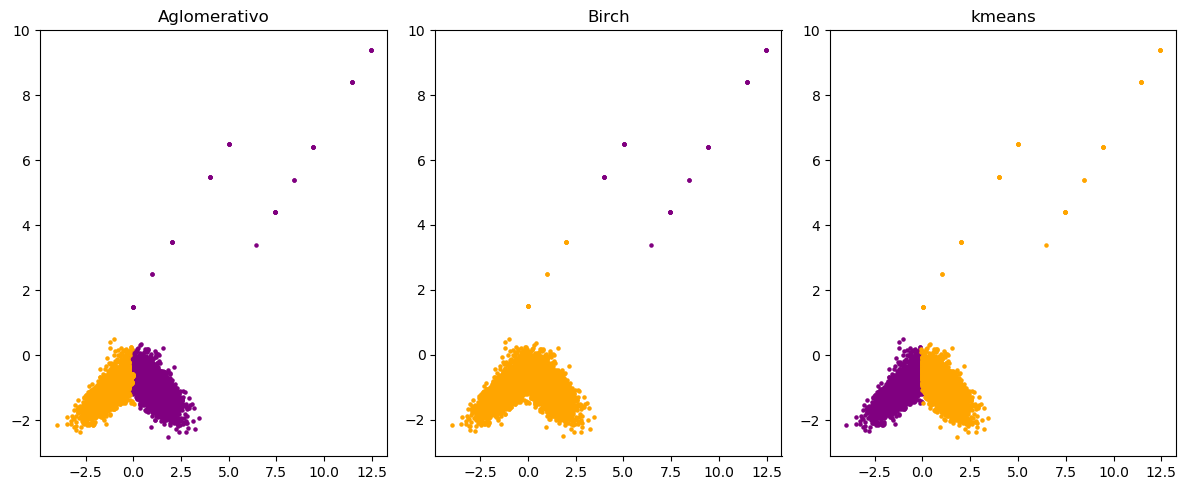

In [161]:
# visualização

# Criar a figura e os subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Scatterplot 1
axs[0].scatter(df_resultados4.loc[df_resultados4["Agromerativo"] == 0, "variavel1"],
               df_resultados4.loc[df_resultados4["Agromerativo"] == 0, "variavel2"],
              s = 5, c = 'purple', label = 'grupo0')
axs[0].scatter(df_resultados4.loc[df_resultados4["Agromerativo"] == 1, "variavel1"],
               df_resultados4.loc[df_resultados4["Agromerativo"] == 1, "variavel2"],
              s = 5, c = 'orange', label = 'grupo1')
axs[0].set_title('Aglomerativo')

# Scatterplot 2
axs[1].scatter(df_resultados4.loc[df_resultados4["birch"] == 0, "variavel1"],
               df_resultados4.loc[df_resultados4["birch"] == 0, "variavel2"],
              s = 5, c = 'purple', label = 'grupo0')
axs[1].scatter(df_resultados4.loc[df_resultados4["birch"] == 1, "variavel1"],
               df_resultados4.loc[df_resultados4["birch"] == 1, "variavel2"],
              s = 5, c = 'orange', label = 'grupo1')
axs[1].set_title('Birch')

# Scatterplot 3
axs[2].scatter(df_resultados4.loc[df_resultados4["kmeans"] == 0, "variavel1"],
               df_resultados4.loc[df_resultados4["kmeans"] == 0, "variavel2"],
              s = 5, c = 'purple', label = 'grupo0')
axs[2].scatter(df_resultados4.loc[df_resultados4["kmeans"] == 1, "variavel1"],
               df_resultados4.loc[df_resultados4["kmeans"] == 1, "variavel2"],
              s = 5, c = 'orange', label = 'grupo1')
axs[2].set_title('kmeans')

# Ajustar o layout e exibir o gráfico
plt.tight_layout()
plt.show()

Podemos observar como o Birch perfoma melhor que os demais metodos vistos até agora.